# Lab 4 - Image Classification

## Load and prepare Data

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from PIL import Image

Function for loading images

In [2]:
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize(image_size)
        img_array = np.array(img).flatten() # Flatten the image
        images.append(img_array)
        labels.append(label)
    return images, labels

Load the data and convert them into NumPy arrays

In [3]:
cat_images, cat_labels = load_images_from_folder('./data/cat', 0)
dog_images, dog_labels = load_images_from_folder('./data/dog', 1)

x = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

Split into training and testing

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Initialize and train the Model

In [5]:
k = 5 # Set number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Classification Report

In [6]:
from sklearn.metrics import  confusion_matrix, classification_report

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=["Cat", "Dog"])
print("Classification Report:")
print(class_report)

Test Accuracy: 62.50%
Confusion Matrix:
[[31 13]
 [17 19]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.65      0.70      0.67        44
         Dog       0.59      0.53      0.56        36

    accuracy                           0.62        80
   macro avg       0.62      0.62      0.62        80
weighted avg       0.62      0.62      0.62        80



## Testing Single Image

In [7]:
def preprocess_image(image_path, image_size=(64, 64)):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img).flatten() # Flatten into 1D array
    return img_array.reshape(1, -1) # Reshape to 2D array for prediction

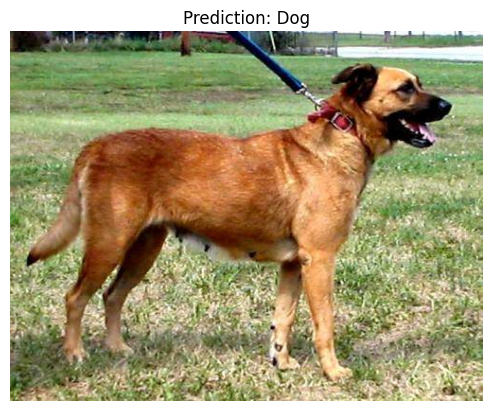

In [11]:
import matplotlib.pyplot as plt

def display_image_with_label(image_path, label):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {'Cat' if label == 0 else 'Dog'}")
    plt.show()

new_image_path = './testt/dog.318.jpg'
new_image = preprocess_image(new_image_path)
prediction = knn.predict(new_image)[0]
display_image_with_label(new_image_path, prediction)